<a href="https://colab.research.google.com/github/20adityasingh/MLPractice2/blob/master/MLPractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
data=pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,525
dependents,2463
occupation,80
city,803
customer_nw_category,0
branch_code,0
current_balance,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
data['current_balance'].describe()

,current_balance
count,2.838200e+04
mean,7.380552e+03
std,4.259871e+04
min,-5.503960e+03
25%,1.784470e+03
50%,3.281255e+03
75%,6.635820e+03
max,5.905904e+06


In [ ]:
churn_by_occupation = data.groupby('occupation')['churn'].sum().reset_index()
churn_by_occupation.rename(columns={'churn': 'number_of_churn'}, inplace=True)

print(churn_by_occupation)

      occupation  number_of_churn
0        company                4
1        retired              305
2       salaried             1147
3  self_employed             3467
4        student              324


In [ ]:
nan_mask = data['occupation'].isna()

nan_churn_count = data[nan_mask]['churn'].sum()

print("Number of churned customers with NaN occupation:", nan_churn_count)

Number of churned customers with NaN occupation: 13


In [ ]:
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

,0
customer_id,int64
vintage,int64
age,int64


In [ ]:
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

data[['dependents','city']].dtypes

,0
dependents,Int64
city,category


In [ ]:
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data[['gender','occupation']].dtypes

,0
gender,category
occupation,category


In [ ]:
date = pd.to_datetime(data['last_transaction'])

In [ ]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dt.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.dt.isocalendar().week

# month of year when last transaction was done
data['moy_ls_tran'] = date.dt.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dt.dayofweek

In [ ]:
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21,5.0,1.0
1,2019-11-01,305.0,44,11.0,4.0
2,NaT,NaN,<NA>,NaN,NaN
3,2019-08-06,218.0,32,8.0,1.0
4,2019-11-03,307.0,44,11.0,6.0


In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,category
dependents,Int64
occupation,category
city,category
customer_nw_category,category
branch_code,category
current_balance,float64


In [ ]:
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

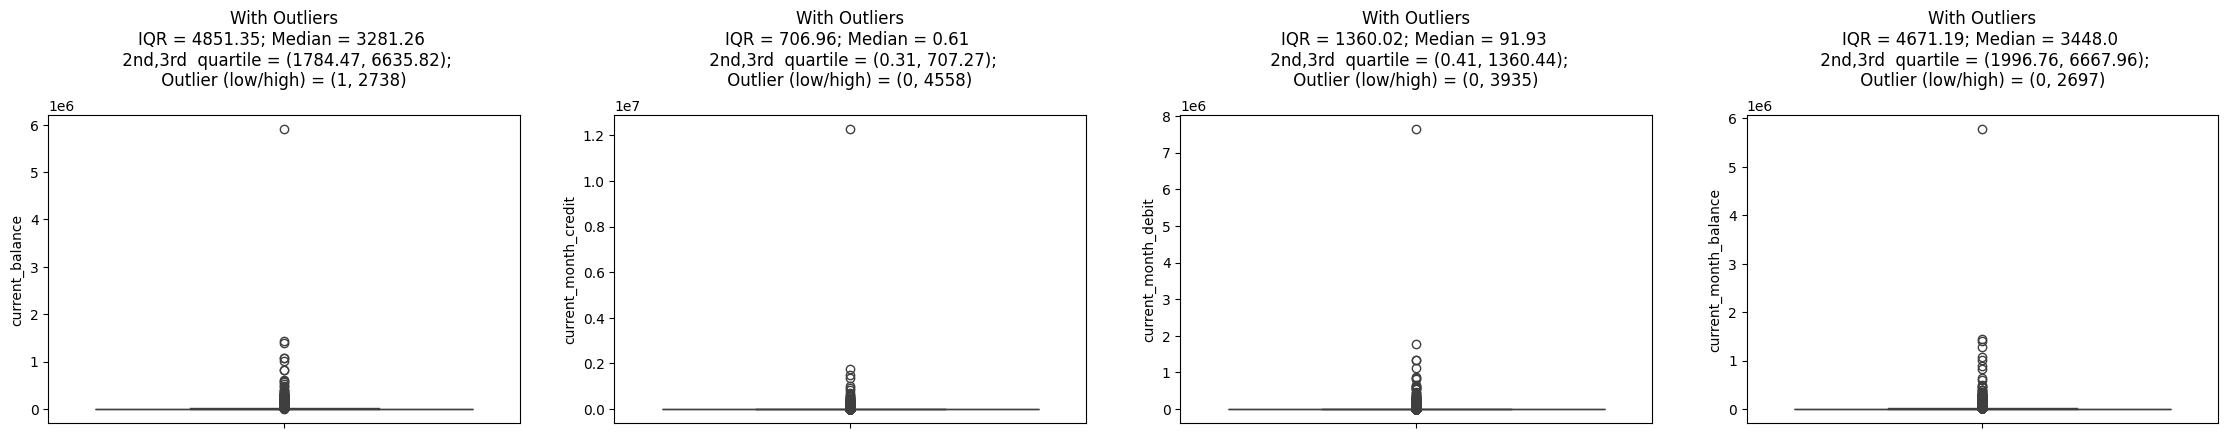

In [ ]:
UVA_outlier(data, current_month,)

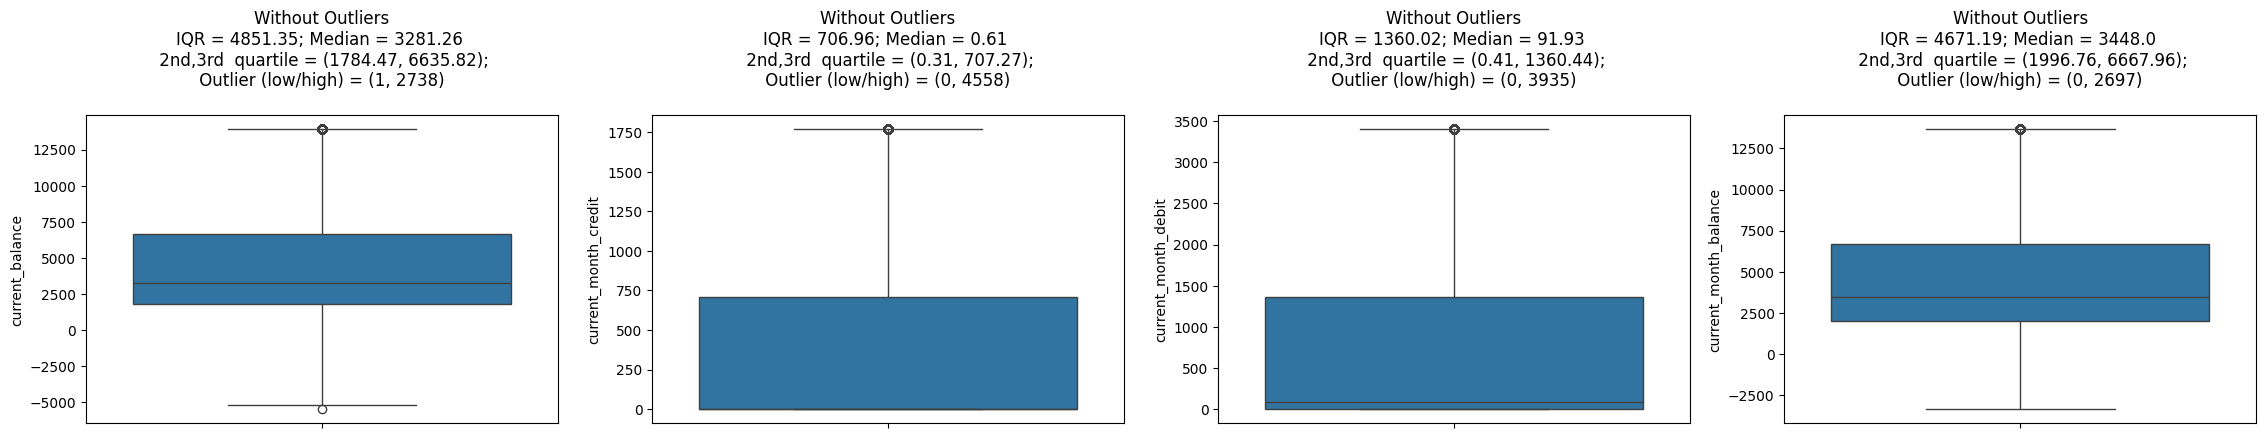

In [ ]:
UVA_outlier(data, current_month, include_outlier=False)

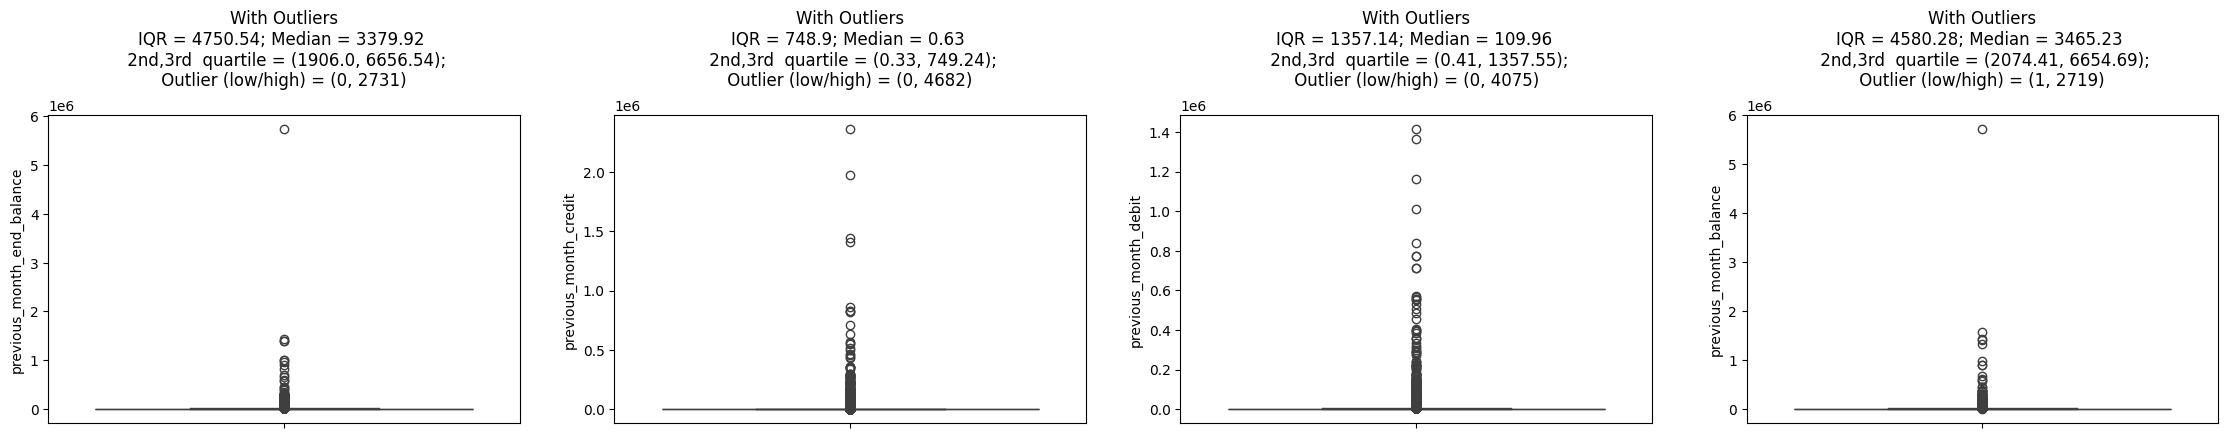

In [ ]:
UVA_outlier(data, previous_month)

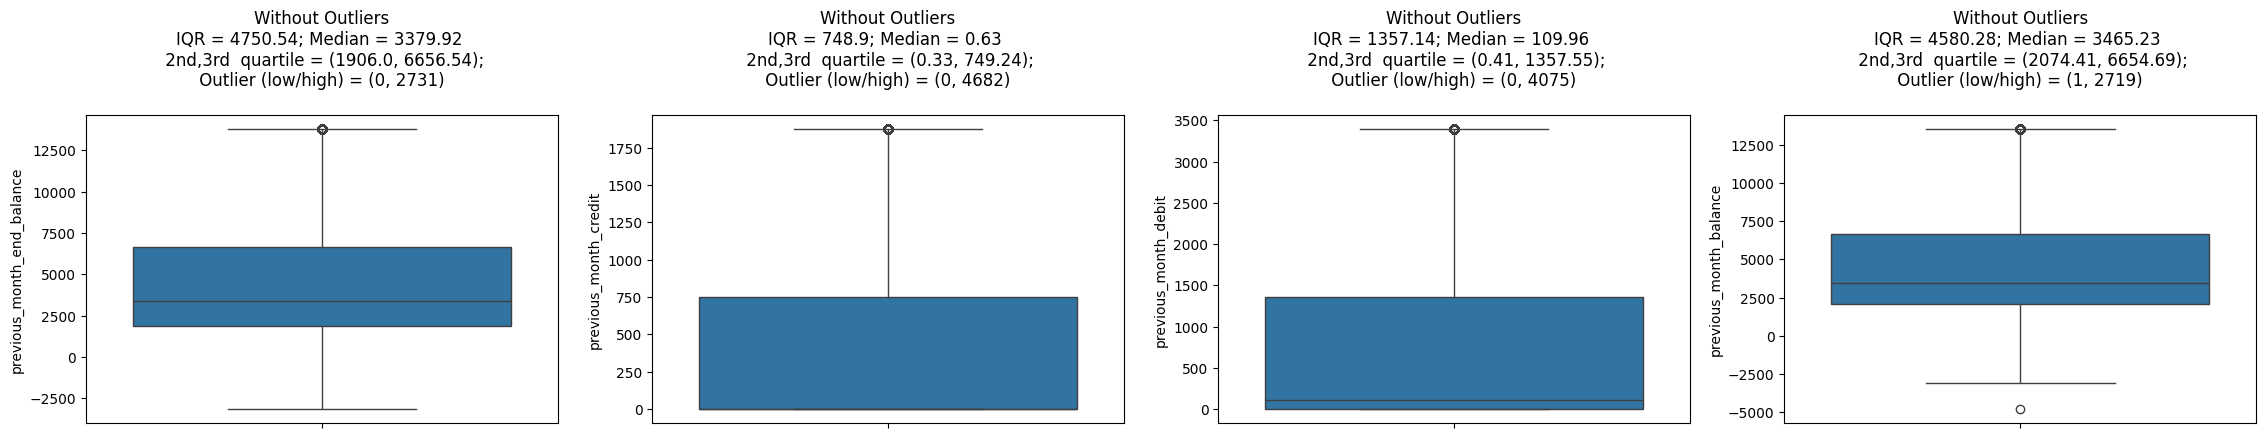

In [ ]:
UVA_outlier(data, previous_month, include_outlier=False)

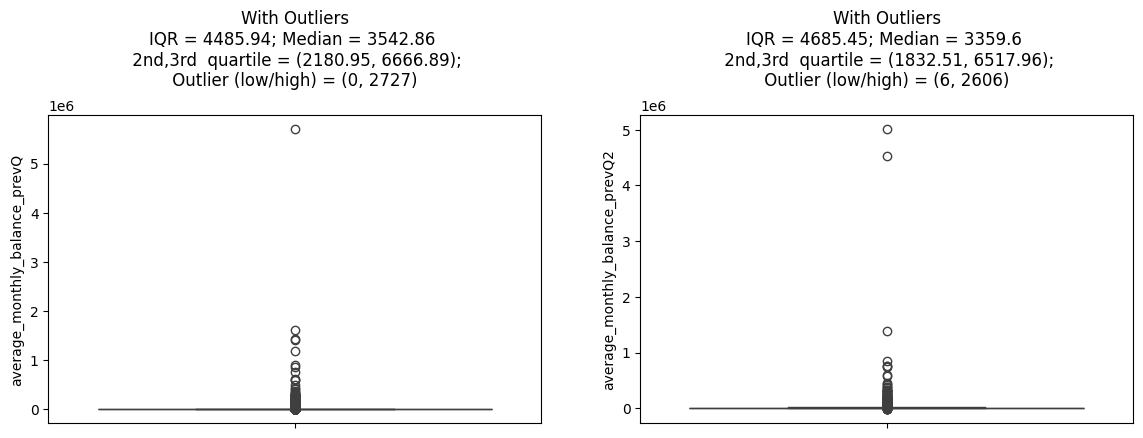

In [ ]:
UVA_outlier(data,previous_quarters)

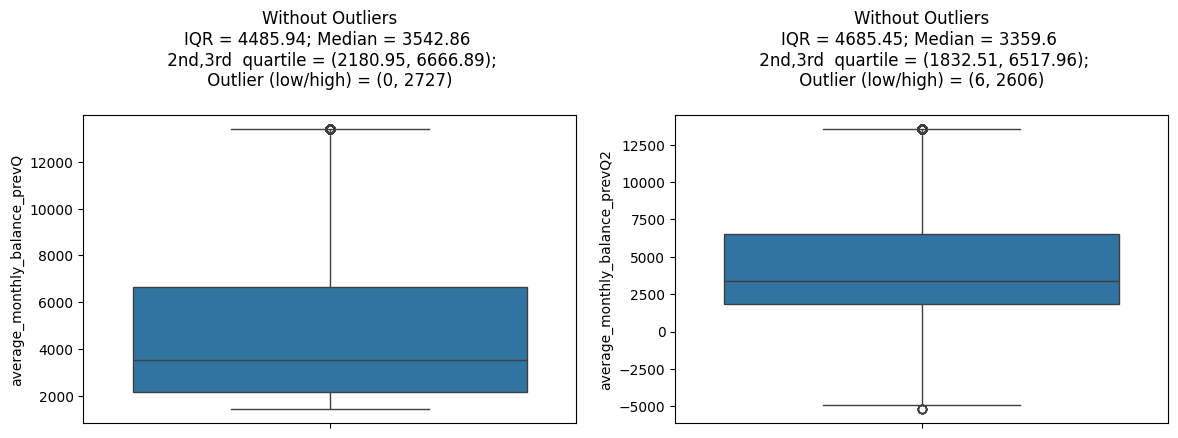

In [ ]:
UVA_outlier(data,previous_quarters, include_outlier = False)

In [ ]:
# calculating descriptives of variable
col = ['current_balance','current_month_credit','current_month_debit','current_month_balance','previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
for i in col:
  if data[i].dtype == 'int' or data[i].dtype == 'float':
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    data[i][data[i]>whis_high] = whis_high+1
    data[i][data[i]<whis_low] = whis_low-1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customer_id                     28382 non-null  int64   
 1   vintage                         28382 non-null  int64   
 2   age                             28382 non-null  int64   
 3   gender                          27857 non-null  category
 4   dependents                      25919 non-null  Int64   
 5   occupation                      28302 non-null  category
 6   city                            27579 non-null  category
 7   customer_nw_category            28382 non-null  category
 8   branch_code                     28382 non-null  category
 9   current_balance                 28382 non-null  float64 
 10  previous_month_end_balance      28382 non-null  float64 
 11  average_monthly_balance_prevQ   28382 non-null  float64 
 12  average_monthly_ba

<ipython-input-364-ded9b6d52746>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>whis_high] = whis_high+1
<ipython-input-364-ded9b6d52746>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<whis_low] = whis_low-1
<ipython-input-364-ded9b6d52746>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>whis_high] = whis_high+1
<ipython-input-364-ded9b6d52746>:15: SettingWithCopyWarning: 
A value

In [ ]:
data.drop('dependents',axis=1,inplace=True)

In [ ]:
data.drop('city',axis=1,inplace=True)

In [ ]:
data.drop('customer_id',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
vintage,0
age,0
gender,525
occupation,80
customer_nw_category,0
branch_code,0
current_balance,0
previous_month_end_balance,0
average_monthly_balance_prevQ,0
average_monthly_balance_prevQ2,0


In [ ]:
day = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']
for i in day:
  imputer = SimpleImputer(strategy='median', missing_values=np.nan)
  data[i] = imputer.fit_transform(data[i].values.reshape(-1,1))
  data[i] = data[i].ravel()
  data[i] = data[i].astype('int64')

In [ ]:
col = ['gender', 'occupation']
for i in col:
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  # Reshape the data to a 2D array before imputation
  data[i] = imputer.fit_transform(data[i].values.reshape(-1, 1))[:, 0]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         28382 non-null  int64   
 1   age                             28382 non-null  int64   
 2   gender                          28382 non-null  object  
 3   occupation                      28382 non-null  object  
 4   customer_nw_category            28382 non-null  category
 5   branch_code                     28382 non-null  category
 6   current_balance                 28382 non-null  float64 
 7   previous_month_end_balance      28382 non-null  float64 
 8   average_monthly_balance_prevQ   28382 non-null  float64 
 9   average_monthly_balance_prevQ2  28382 non-null  float64 
 10  current_month_credit            28382 non-null  float64 
 11  previous_month_credit           28382 non-null  float64 
 12  current_month_debi

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

In [ ]:
x = data.drop('churn_1',axis=1)
y = data['churn_1']
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accur = lr.score(x_test,y_test)
print(accur)

0.7697005284791545


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rec = recall_score(y_test,y_pred)
print(rec)

0.6104651162790697


In [ ]:
preci = precision_score(y_test,y_pred)
print(preci)

0.41033434650455924


In [ ]:
f1 = f1_score(y_test,y_pred)
print(f1)

0.4907816151648922


In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[5609 1358]
 [ 603  945]]
